In [1]:
# @Author: Richard Levy (Dinesh Kumar Gupta)
# Classification of human activity (walking, descending_stairs, ascending_stairs, and driving)  
# of accelerometer data recorded at left-wrist using CNN 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/adultaccelerometerdata/id00b70b13.csv


In [2]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
import sklearn
print("import is complete")

import is complete


In [3]:
# Reading the csv data file
df = pd.read_csv("../input/adultaccelerometerdata/id00b70b13.csv")
df.head()

,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z
0,99,0.01,0.039,1.020,-0.020,-0.180,1.234,0.023,0.156,0.855,-0.582,0.887,0.449,0.074
1,99,0.02,-0.629,-0.461,0.973,-0.246,0.137,0.969,-0.707,0.559,0.449,-0.027,0.141,0.934
2,99,0.03,-0.926,-1.262,0.691,0.238,-0.328,1.219,-1.445,1.367,0.367,-0.164,0.660,1.344
3,99,0.04,-0.871,-1.496,-0.246,0.711,-0.484,0.414,-1.660,1.645,-0.543,-0.141,1.027,0.707
4,99,0.05,-0.727,-1.621,-0.559,1.031,-0.297,0.145,-1.762,1.676,-0.918,-0.121,1.230,0.438


In [4]:
# Taking left_wrist ie. lw_x, lw_y, lw_z data only
data = df.drop(columns=['time_s', 'lh_x', 'lh_y', 'lh_z',
       'la_x', 'la_y', 'la_z', 'ra_x', 'ra_y', 'ra_z'])
data.head()

,activity,lw_x,lw_y,lw_z
0,99,0.039,1.020,-0.020
1,99,-0.629,-0.461,0.973
2,99,-0.926,-1.262,0.691
3,99,-0.871,-1.496,-0.246
4,99,-0.727,-1.621,-0.559


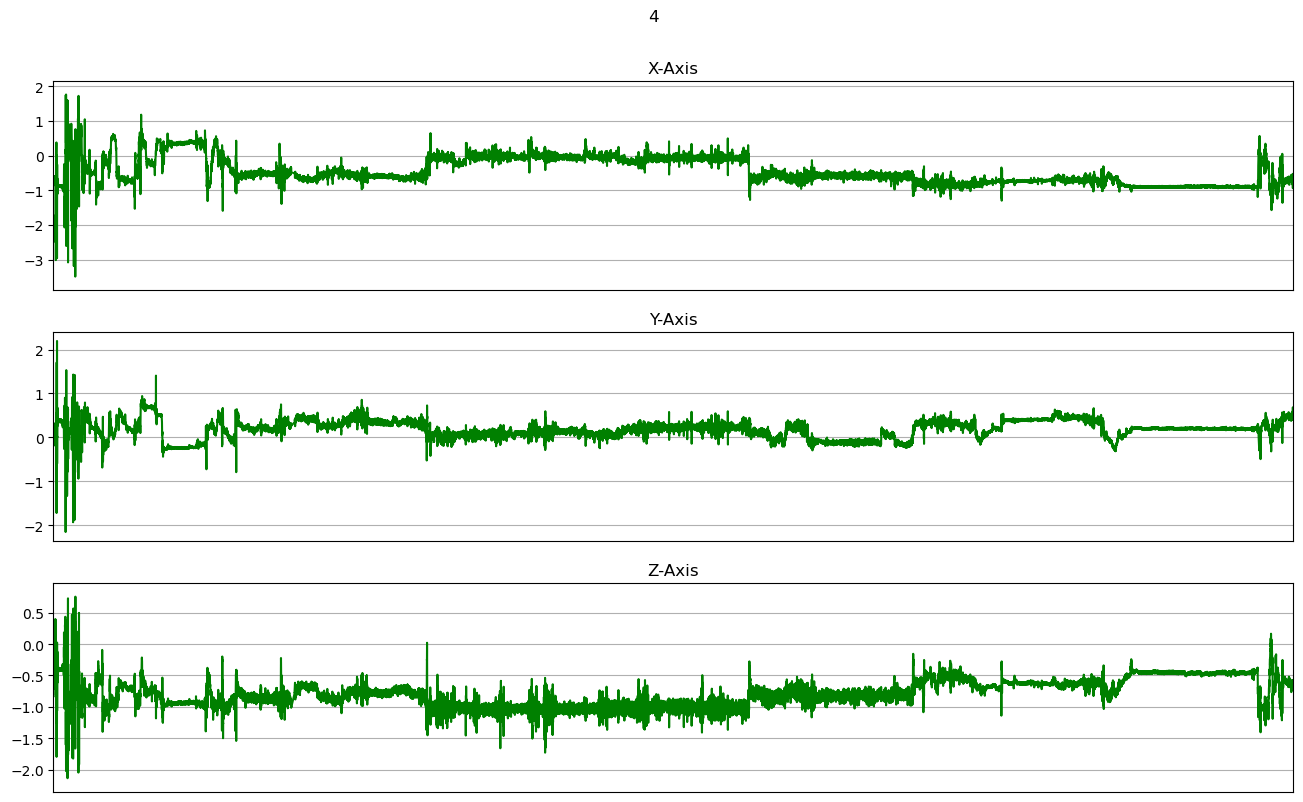

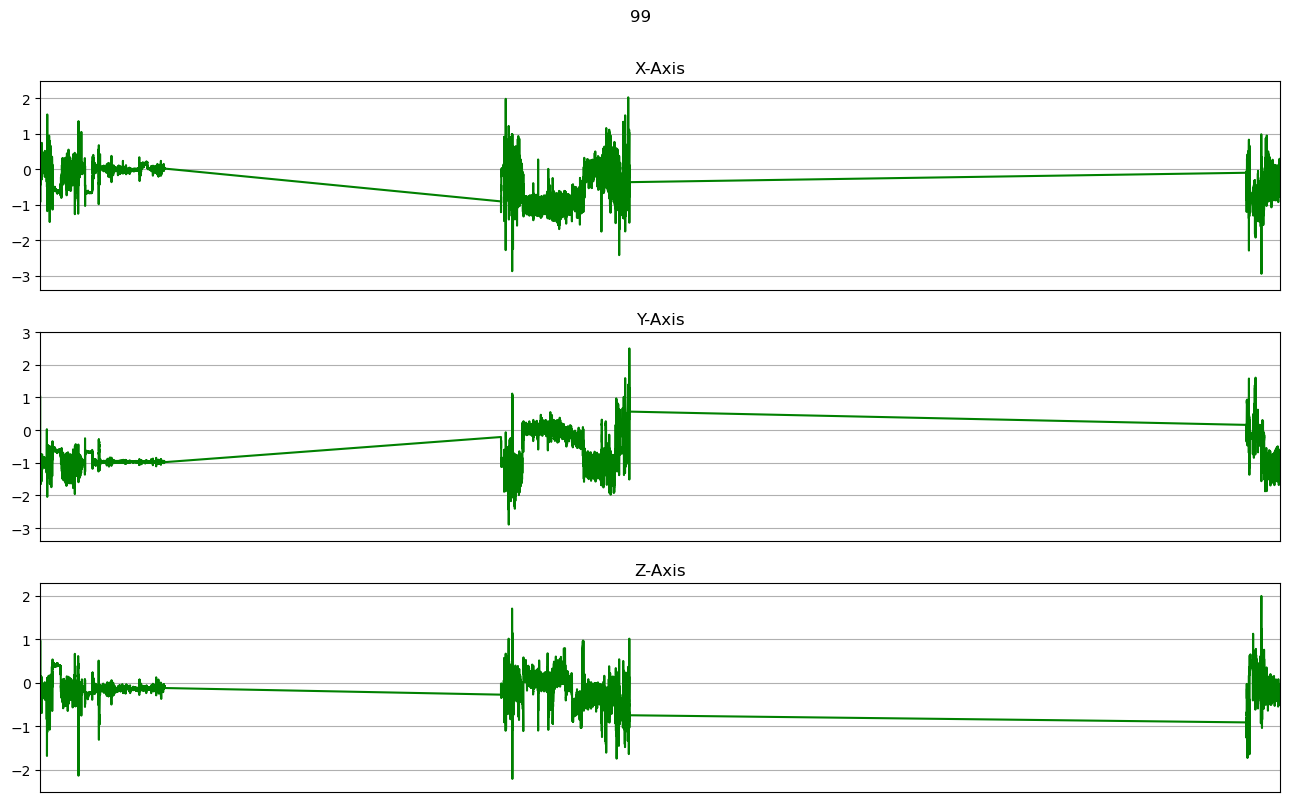

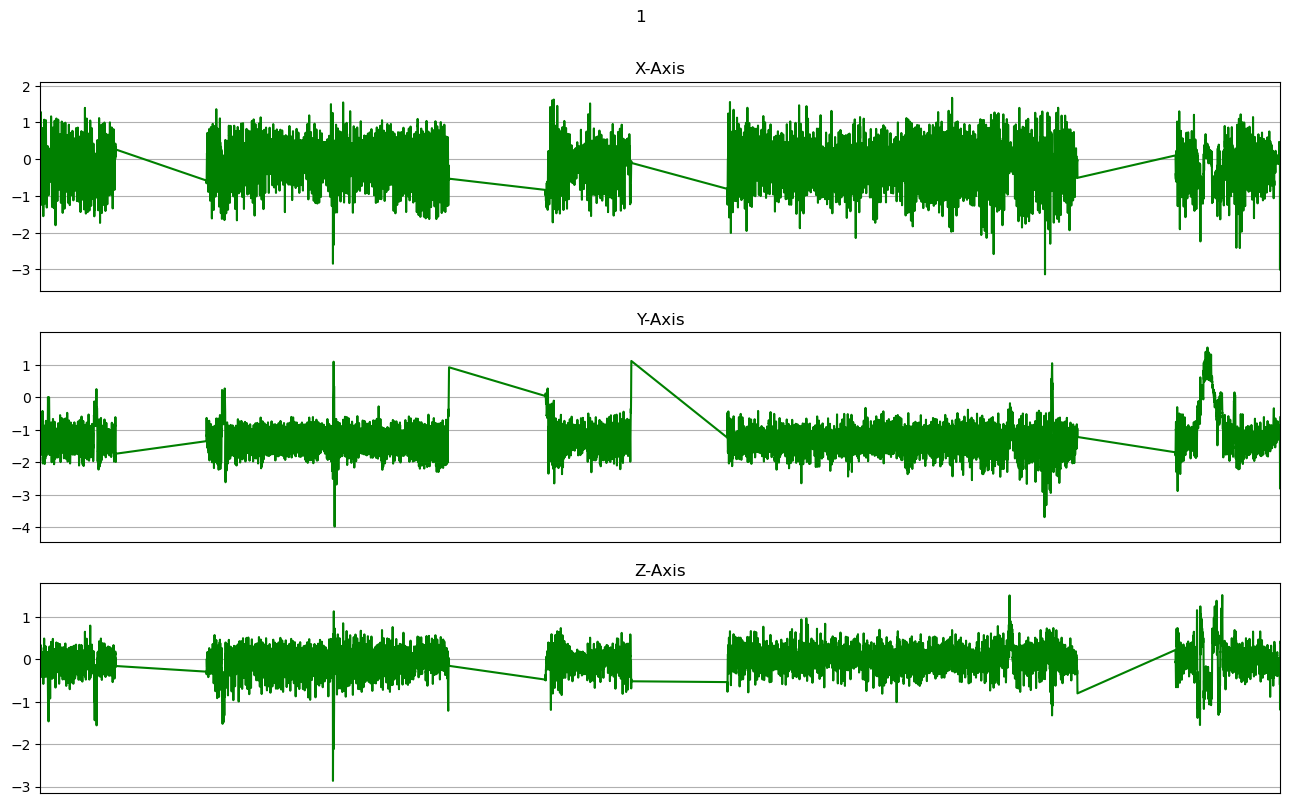

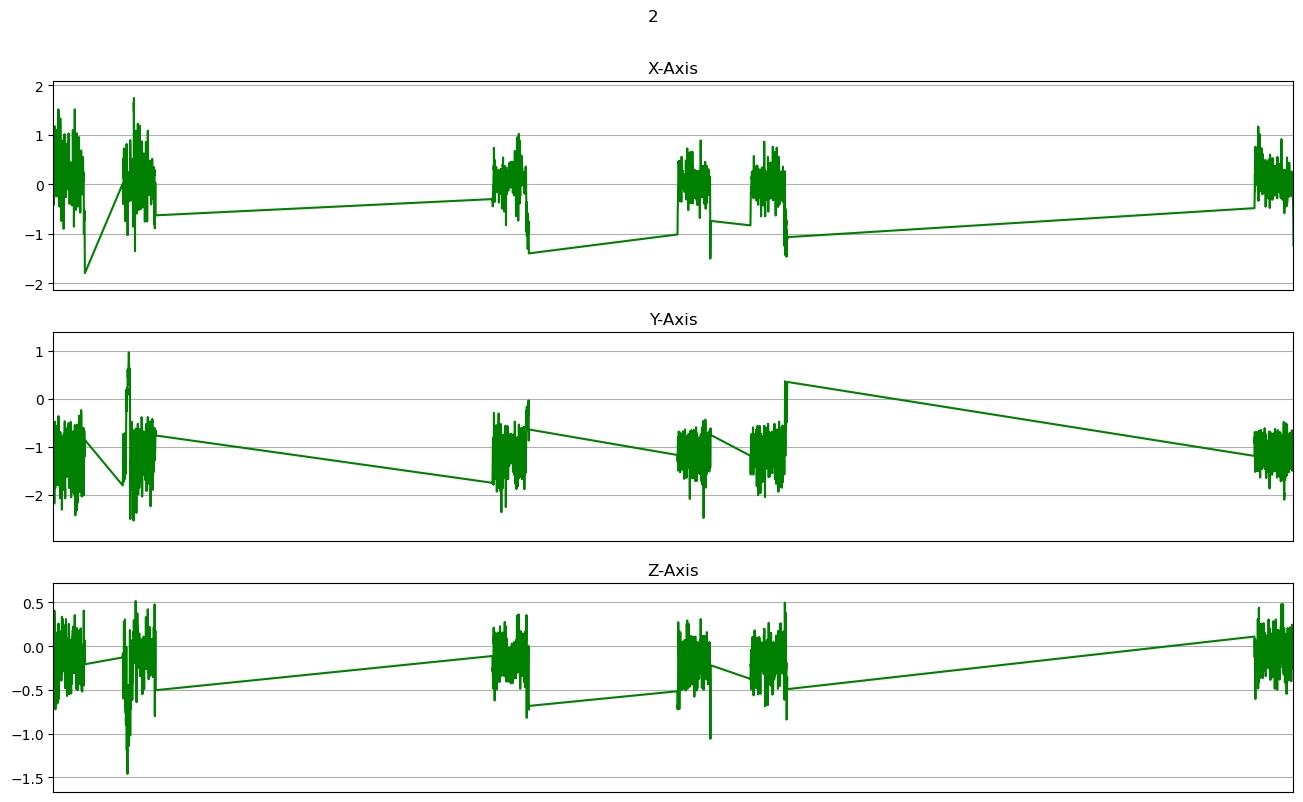

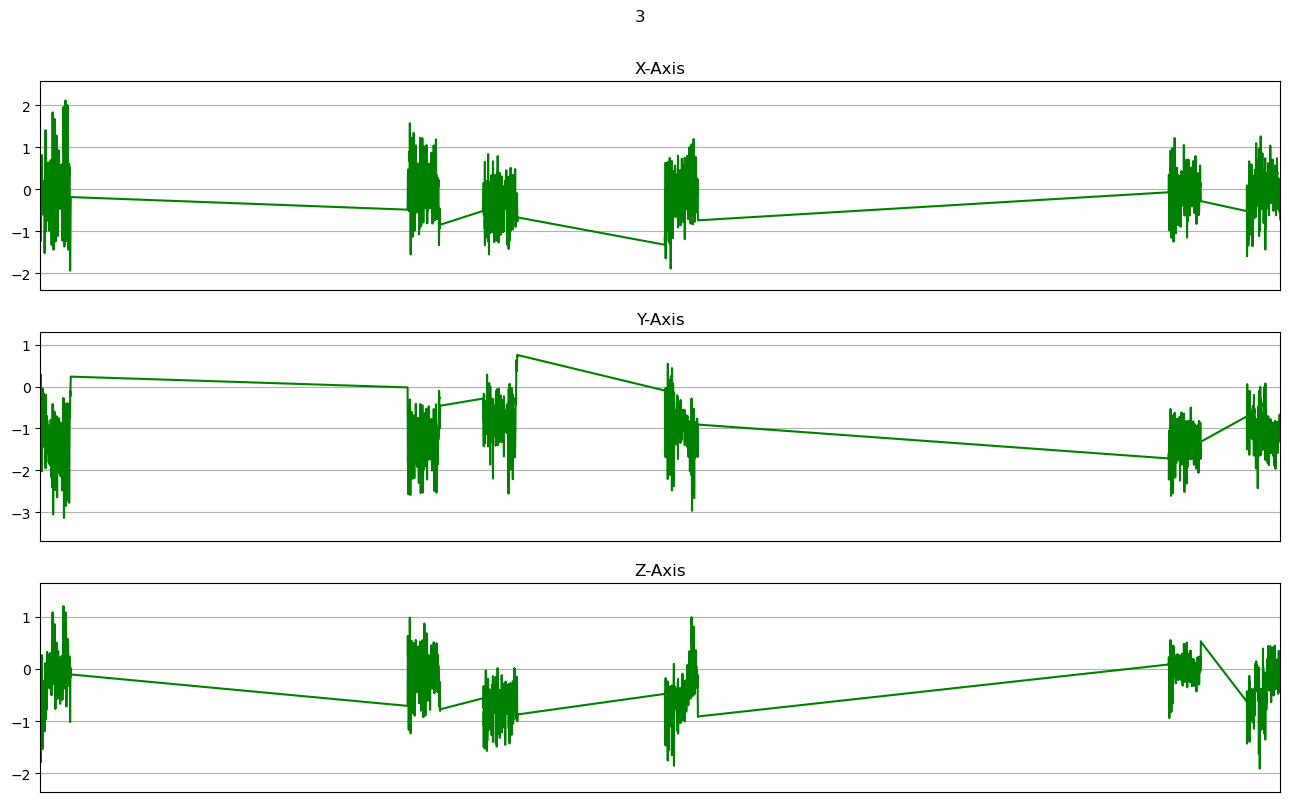

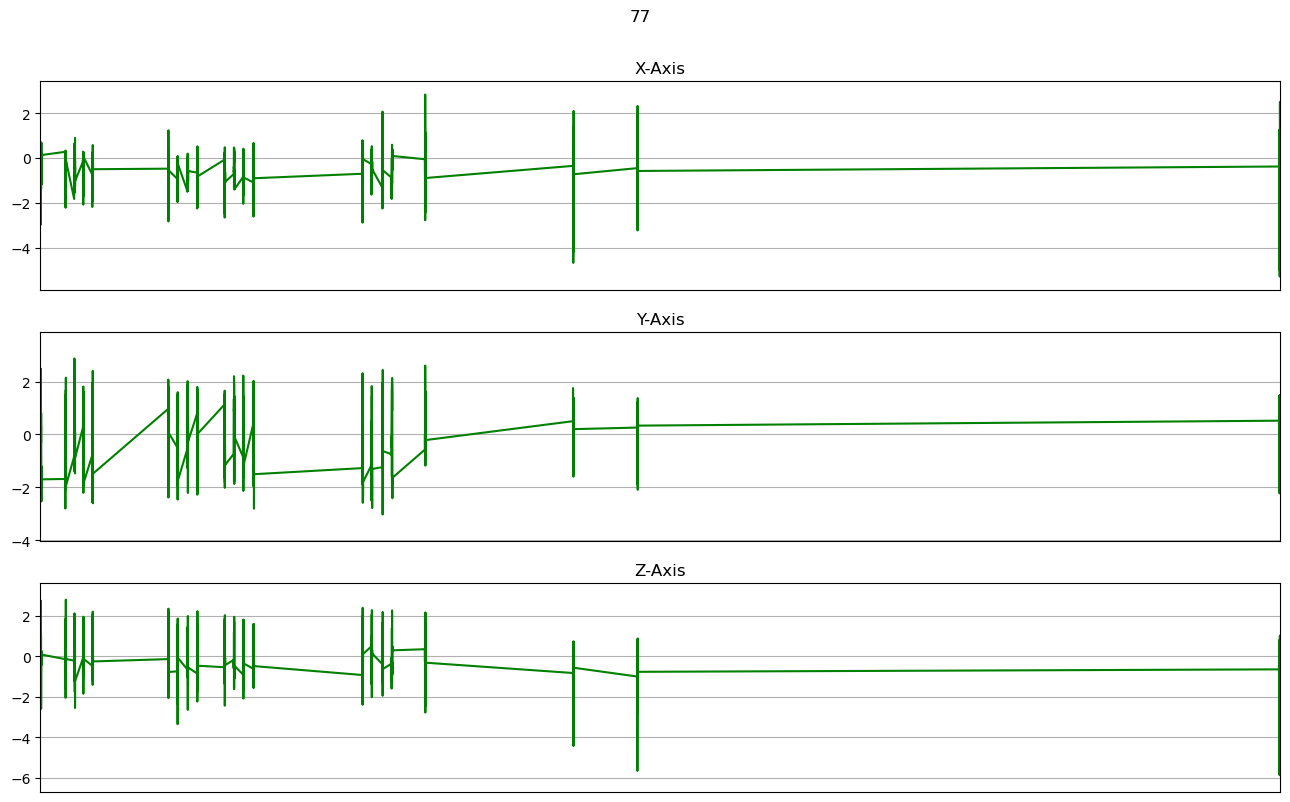

In [5]:
# Visualing the raw data using plt

activities = df["activity"].value_counts().index

sample_frequency = 100

def plot_activity(activity, df):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(16,9), sharex=True)
    plot_axis(ax0, df["time_s"], df["lw_x"], "X-Axis")
    plot_axis(ax1, df["time_s"], df["lw_y"], "Y-Axis")
    plot_axis(ax2, df["time_s"], df["lw_z"], "Z-Axis")
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.9)
    plt.show()

def plot_axis(ax, lw_x, lw_y, title):
    ax.plot(lw_x, lw_y, "g")
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(lw_y) - np.std(lw_y), max(lw_y) + np.std(lw_y)])
    ax.set_xlim([min(lw_x), max(lw_x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = df[(df["activity"] == activity)] [:sample_frequency * 600]
    plot_activity(activity, data_for_plot)
    

In [6]:
# Look over the number of data distributtion in sublabel of activity
data["activity"].value_counts()

4     128537
99    103888
1      48440
2       9766
3       9125
77      3544
Name: activity, dtype: int64

In [7]:
# Dropping label 77, 99 from the column of activity
data1 = data[~data['activity'].isin([77, 99])]
data1["activity"].value_counts()

4    128537
1     48440
2      9766
3      9125
Name: activity, dtype: int64

In [8]:
# taking the uniformly distributed data using groupby() method 
data2 = data1.groupby("activity").head(9125)
data2["activity"].value_counts()

1    9125
2    9125
3    9125
4    9125
Name: activity, dtype: int64

In [9]:
# Encoding the label using LabelEncoder
from sklearn.preprocessing import LabelEncoder
tags = LabelEncoder()
data2["tags"] = tags.fit_transform(data2["activity"])
data2.head()

/tmp/ipykernel_20/3698428201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["tags"] = tags.fit_transform(data2["activity"])


,activity,lw_x,lw_y,lw_z,tags
26313,1,0.137,-1.648,0.082,0
26314,1,0.156,-1.594,0.098,0
26315,1,0.160,-1.539,0.109,0
26316,1,0.156,-1.504,0.113,0
26317,1,0.148,-1.500,0.105,0


In [10]:
# Observe the created tags
tags.classes_

array([1, 2, 3, 4])

In [11]:
# Assigning data to X and labels to y variable
X = data2[['lw_x', 'lw_y', 'lw_z']]
y = data2["tags"]

In [12]:
# Standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data=X, columns=['lw_x', 'lw_y', 'lw_z'])
scaled_X["tags"] = y.values

scaled_X 

,lw_x,lw_y,lw_z,tags
0,0.392449,-1.117693,0.979962,0
1,0.433664,-1.043253,1.017951,0
2,0.442341,-0.967433,1.044069,0
3,0.433664,-0.919184,1.053566,0
4,0.416311,-0.913670,1.034571,0
...,...,...,...,...
36495,-1.260486,1.530474,-1.180666,3
36496,-1.277840,1.541502,-1.244772,3
36497,-1.225779,1.547016,-1.209157,3
36498,-1.132503,1.547016,-1.161671,3


In [13]:
# Creating a get_frames function
import scipy.stats as stats

Fs = 100
frame_size = Fs * 6
hop_size = Fs * 2

def get_frames(data1, frame_size, hop_size):
    """
    This get_frames function will mainly create a frame_size and hop_size in the
    given dataset.
    """
    N_FEATURES = 3
    
    # creating empty list of frames and tags
    features = []
    tags_ = []
    for i in range(0, len(data1) - frame_size + 1, hop_size):
        lw_x = data1["lw_x"].values[i:i + frame_size]
        lw_y = data1["lw_y"].values[i:i + frame_size]
        lw_z = data1["lw_z"].values[i:i + frame_size]

        # retrieve the most often used label in this segment 
        tags = stats.mode(data1["tags"][i: i + frame_size])[0][0]
        features.append([lw_x, lw_y, lw_z])
        tags_.append(tags)

    # bring the segments into a better shape 
    features = np.asarray(features).reshape(-1, frame_size, N_FEATURES)
    tags_ = np.asarray(tags_)

    return features, tags_

In [14]:
# Integrating the X varibles and y variables in get_frames function
X, y = get_frames(scaled_X, frame_size, hop_size)

/tmp/ipykernel_20/718914130.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  tags = stats.mode(data1["tags"][i: i + frame_size])[0][0]


In [15]:
#Examine the dimension of X and y variable
X.shape, y.shape

((180, 600, 3), (180,))

In [16]:
# Segregating the data into train, and test data sets
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                            random_state=0, stratify=y)

In [17]:
# Check the dimension of train and test data
X_train.shape, X_test.shape

((144, 600, 3), (36, 600, 3))

In [18]:
# examine the dimension of train and test data
#X_train.shape[0], X_test.shape[1]

In [19]:
# examine the dimension of train and test data
X_train[0].shape, X_test[0].shape

((600, 3), (600, 3))

In [20]:
# Convert the data into 3D vector using reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 3, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 3, 1)

In [21]:
# See the shape of X_train, X_test
X_train[0].shape, X_test[0].shape

((600, 3, 1), (600, 3, 1))

In [22]:
# import the important libraries
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D 
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [23]:
# Creating a CNN model
model = Sequential()
model.add(Conv2D(16, (2, 2), activation="relu", input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation="relu"))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(6, activation="softmax"))

In [24]:
# compiling the cnn model and optimizing with Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"])

In [25]:
# Training and validating 
history = model.fit(X_train, y_train, epochs=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/32
5/5 [==============================] - 2s 100ms/step - loss: 1.3040 - accuracy: 0.4722 - val_loss: 0.8381 - val_accuracy: 0.4722
Epoch 2/32
5/5 [==============================] - 0s 37ms/step - loss: 0.8698 - accuracy: 0.6181 - val_loss: 0.7396 - val_accuracy: 0.6389
Epoch 3/32
5/5 [==============================] - 0s 36ms/step - loss: 0.6390 - accuracy: 0.7500 - val_loss: 0.5401 - val_accuracy: 0.7778
Epoch 4/32
5/5 [==============================] - 0s 34ms/step - loss: 0.5562 - accuracy: 0.7639 - val_loss: 0.5018 - val_accuracy: 0.8333
Epoch 5/32
5/5 [==============================] - 0s 35ms/step - loss: 0.4182 - accuracy: 0.8125 - val_loss: 0.4549 - val_accuracy: 0.7778
Epoch 6/32
5/5 [==============================] - 0s 36ms/step - loss: 0.3737 - accuracy: 0.8542 - val_loss: 0.4560 - val_accuracy: 0.7778
Epoch 7/32
5/5 [==============================] - 0s 39ms/step - loss: 0.3442 - accuracy: 0.8750 - val_loss: 0.4403 - val_accuracy: 0.8056
Epoch 8/32
5/5 [==========

In [26]:
# A function for plot learning curve
def plot_learning_curve(history, epochs):
    # Plot model accuracy 
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history["accuracy"])
    plt.plot(epoch_range, history.history["val_accuracy"])
    plt.title("leftwrist_frame_size_6_Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "validation"], loc="upper left")
    plt.show()

    # plot model loss 
    plt.plot(epoch_range, history.history["loss"])
    plt.plot(epoch_range, history.history["val_loss"])
    plt.title("leftwrist_frame_size_6_Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "validation"], loc="upper left")
    plt.show()

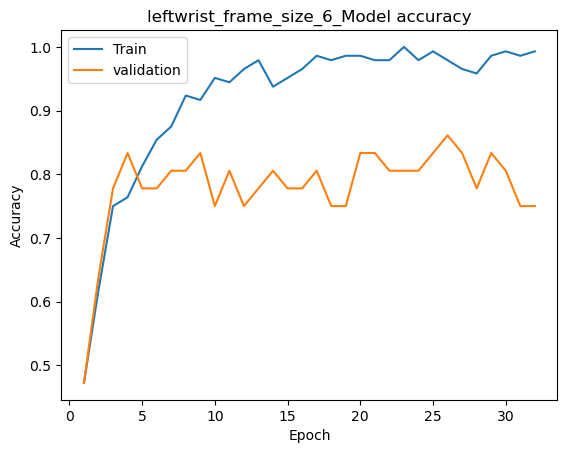

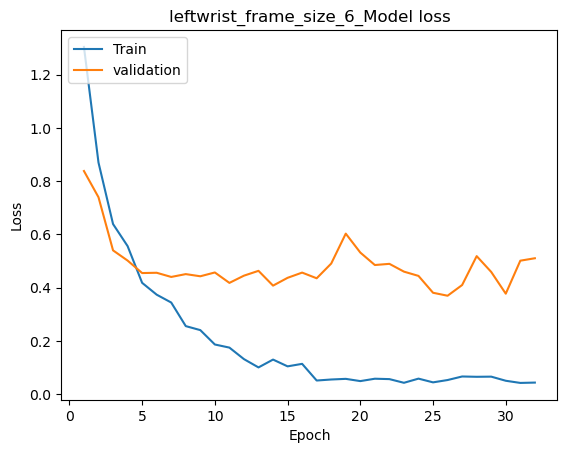

In [27]:
# Display the graph of model accuracy and model loss
plot_learning_curve(history, 32)

In [28]:
# importing libraries and modules
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("imported")

imported


In [29]:
# computing y_pred
y_pred = np.argmax(model.predict(X_test), axis=-1)

2/2 [==============================] - 0s 4ms/step


[[8 0 1 0]
 [1 4 4 0]
 [2 1 6 0]
 [0 0 0 9]]


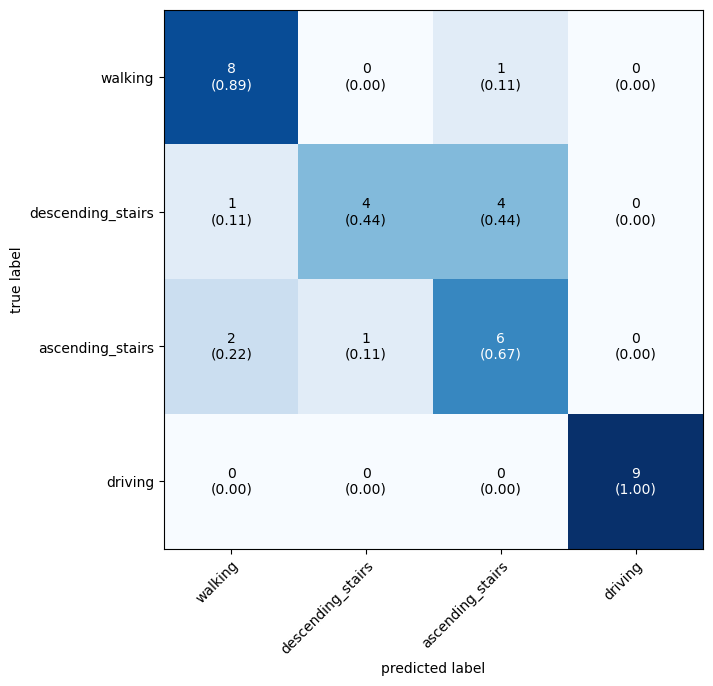

In [30]:
#plotting confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
class_name = ["walking", "descending_stairs","ascending_stairs", "driving"]
plot_confusion_matrix(conf_mat=confusion_mat, class_names=class_name, show_normed=True, 
                      figsize=(7,7))
print(confusion_mat)

In [31]:
# computing classification report (Precision, Recall, f1 score) and accuracy score
from sklearn.metrics import classification_report, accuracy_score

class_name = tags.classes_


cr = classification_report(y_test, y_pred, labels=class_name)
accs = accuracy_score(y_test, y_pred)
print(cr)
print(f"Accuracy score of left wrist frame size 6 is : {accs}")

              precision    recall  f1-score   support

           1       0.80      0.44      0.57         9
           2       0.55      0.67      0.60         9
           3       1.00      1.00      1.00         9
           4       0.00      0.00      0.00         0

   micro avg       0.76      0.70      0.73        27
   macro avg       0.59      0.53      0.54        27
weighted avg       0.78      0.70      0.72        27

Accuracy score of left wrist frame size 6 is : 0.75


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.